In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Probability theory

**Note that this lecture is currently incomplete; if you come back to the page and this message is gone, you can consider it complete.**

## Intro

### Recap of last time

In the [Introductory lecture](./intro), we X

what we'll covere here: **probability theory**.

### Today: Probability theory

abc

Before jumping in further, let's re-load that same dataset, and while we're at it import the needed packages we'll need to make nice plots:

In [2]:
import xarray as xr

filepath_in = "../data/central-park-station-data_1869-01-01_2023-09-30.nc"
ds_central_park = xr.open_dataset(filepath_in)
precip_central_park = ds_central_park["precip"]
temp_central_park = ds_central_park["temp_avg"]

In [3]:
# First, import the matplotlib package that we'll use for plotting.
from matplotlib import pyplot as plt

# Then update the plotting aesthetics using my own custom package named "puffins"
# See: https://github.com/spencerahill/puffins
from puffins import plotting as pplt
plt.rcParams.update(pplt.plt_rc_params_custom)

## The 3 axioms

Recall the 3 axioms:

1. **Non-negativity**: the probability $P$ of any event $E$ is at least zero: $P(E)\geq0$
2. **X**: the probability $P$ of the sample space $S$ is unity: $P(S)=1$.
3. **Additivity**: For two mutually exclusive events $E_1$ and $E_2$, the probability of their union $E_1\cup E_2$ is the sum of their individual probabilities: $P(E_1\cup E_2)=P(E_1)+P(E_2)$

In class, we used these to formally prove a couple things:

- All probabilities are bounded by 0 and 1: for any event $E$, $0\leq P(E) \leq 1$.
- Probability of the **complement**: If $E$ is an event and $E^C$ is its complement, then $P(E^C)=1-P(E)$

Use these to prove the following: $P((E_1\cup E_2)^C)=1-P(E_1\cup E_2)=1-[P(E_1)+P(E_2)-P(E_1\cap E_2)]$

## Observations, random variables

We consider each **observation**---that is, each inidividual value in any dataset, to be the result of an experiment performed on nature.

A **random variable** is a function that maps the outcome of any observation to a real number.

## Discrete vs. continuous variables

A **discrete** variable is one that can only take on a finite number of values.  A **continuous** variable is one that can take on infinitely many values.

In practice, often physical quantities that are in reality continuous, like temperature, end up as effectively discrete, because they are only reported up to a finite precision.  But unless this precision is quite coarse, we can usually still usefully treat them as if they really were continuous.

## Probability distributions

### Probability mass and density functions

For discrete random variables, the probability mass function specifies the probability of every possible outcome of that variable.  For example, the probability mass function of a fair 6-sided dice would be 1/6 for each of the 6 faces, since they're all equally likely.  

Notice in this dice roll case that the probability mass function summed over all possible up to exactly one...that is true for all probability mass functions.

For *continuous* random variables, 

### Cumulative distribution functions

The **cumulative distribution function** (CDF) of a random variable---whether continuous or discrete---gives the probability for each possible value that the variable is less than or equal to that value.  In other words, for each value $x$, it gives the corresponding **quantile**.  As such, it always ranges from 0 (for values less than the variable's minimum value, or for $-\infty$ if there is no minimum value) to 1 (for values greater than the variable's maximum value, or for $+\infty$ if there is no maximum value).

For discrete variables, the CDF is the sum of the probability mass function over all values less than or equal to the given value: 
$$F(x_j)=\sum_{i=1}^j p(x_i),$$
where $x_j$ is the value of interest, $f(x)$ is the probability mass function, and the values of $x$ are assumed to be ordered from the smallest value $x_0$ to their largest value $x_N$.

For continuous variables, the CDF is the *integral* of the probability density function: 
$$F(x)=P(X\leq x)=\int_{-\infty}^xp(u)\,\mathrm{d}u.$$



### Linking probability mass and density functions to the cumulative distribution function

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
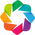

/Users/sah2249/miniconda3/envs/stat-methods-course/lib/python3.11/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/Users/sah2249/miniconda3/envs/stat-methods-course/lib/python3.11/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


Column
    [0] Column
        [0] Markdown(str)
        [1] FloatSlider(end=5, name='Mean', start=-5)
        [2] FloatSlider(end=5, name='Standard Deviation', start=0.1, value=1)
    [1] HoloViews(DynamicMap)

In [4]:
import holoviews as hv
import numpy as np
from scipy.stats import norm
import panel as pn
from holoviews import streams

hv.extension('bokeh')

# Function to plot PDF and CDF
def plot_distribution(mean, std_dev):
    x = np.linspace(-10, 10, 400)
    pdf = norm.pdf(x, mean, std_dev)
    cdf = norm.cdf(x, mean, std_dev)
    
    pdf_curve = hv.Curve((x, pdf), 'X', 'Density').opts(width=400, height=400, line_color='blue')
    cdf_curve = hv.Curve((x, cdf), 'X', 'Cumulative').opts(width=400, height=400, line_color='green')
    
    return (pdf_curve + cdf_curve)

# Create the Panel widgets
mean_slider = pn.widgets.FloatSlider(name='Mean', start=-5, end=5, value=0)
std_dev_slider = pn.widgets.FloatSlider(name='Standard Deviation', start=0.1, end=5, value=1)

# Create the Holoviews stream
dmap_stream = streams.Params(mean_slider, ['value'], rename={'value': 'mean'})
dmap_stream2 = streams.Params(std_dev_slider, ['value'], rename={'value': 'std_dev'})

# Create the DynamicMap
dmap = hv.DynamicMap(plot_distribution, streams=[dmap_stream, dmap_stream2])

# Layout the Panel
pn.Column(pn.Column("## Normal Distribution", mean_slider, std_dev_slider), dmap).servable()

## Expectation and population mean

Conceptually, **expectation** (also known as "expected value") is simply a probability-weighted average over a random variable.  

For a discrete variable, this is
$$E[g(X)]=\sum_{i=1}^Ng(X_i)p_i,$$
where $g(X)$ is some function.

For a continuous variable, the expectation is
$$E[g(X)]=\int_{-\infty}^{\infty}g(x)p(x)\,\mathrm{d}x.$$

## Monte Carlo methods

[Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) are statistical analyses based on repeatedly drawing at random from a given distribution, and doing that many times.  (The name refers to the Monte Carlo Casino in Monaco, where a relative of one of the scientists in the Manhattan Project liked to gamble.)

### Random number generators

A [*random number generator*](https://en.wikipedia.org/wiki/Random_number_generation) is, well, something that generates a random number.

In Python, we can use the various random number generators builtin to `numpy`.  For example, to draw a random number from the standard normal distribution, we use `numpy.random.randn`.  Let's take a look at its docstring to learn more about it:

In [1]:
import numpy as np

np.random.randn?

Signature: np.random.randn(*args)
Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned 

According to the docstring, if we pass it no arguments (or the value 1) it gives use one value, and if we give it a scalar it gives us that many values.  (And if we give it a list of scalars it returns an array with shape equal to that list, but that's not relevant here):

In [3]:
print(np.random.randn())
print(np.random.randn(5))

0.12675523123887542
[ 1.22323319  0.87590637  0.62021951  0.42250395 -1.86409989]


Notice that each time you run these commands, you'll get a different set of numbers, and it's impossible to know ahead of time precisely what those will be:

In [7]:
print(np.random.randn())
print(np.random.randn(5))

1.5792128155073915
[ 0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975]


However, these aren't *truly* random...in short, the computer has pre-computed many sequences (specifically, $2^{32}$ of them), of basically random values, and then when you run your code it quasi-randomly picks one of those sequences.  (This makes it a [pseudorandom](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) number generator.)  If we number all those different sequences from 0 to $2^{32}-1$, that number is called the **seed**.  And you can specify which seed you want using `np.random.seed`.  For example, let's set the seed to be `42` and then re-run the above code.  I am certain that the output will be: `0.4967141530112327` for the first line and `[-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]` for the second line:

In [17]:
np.random.seed(42)
print(np.random.randn())
print(np.random.randn(5))

0.4967141530112327
[-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]


## Theoretical distributions

### Discrete

#### Uniform

#### Binomial

### Continuous

#### Normal ("Gaussian")

The **normal distribution** is crucially important.  Its probability density is given by
$$p(x)=\frac{1}{\sqrt{2\pi}}\frac{1}{\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),$$
where
- $\mu$ is the mean
- $\sigma$ is the standard deviation

If $\mu=0$ and $\sigma=1$, the resulting distribution is called the **standard normal**:
$$p(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right).$$

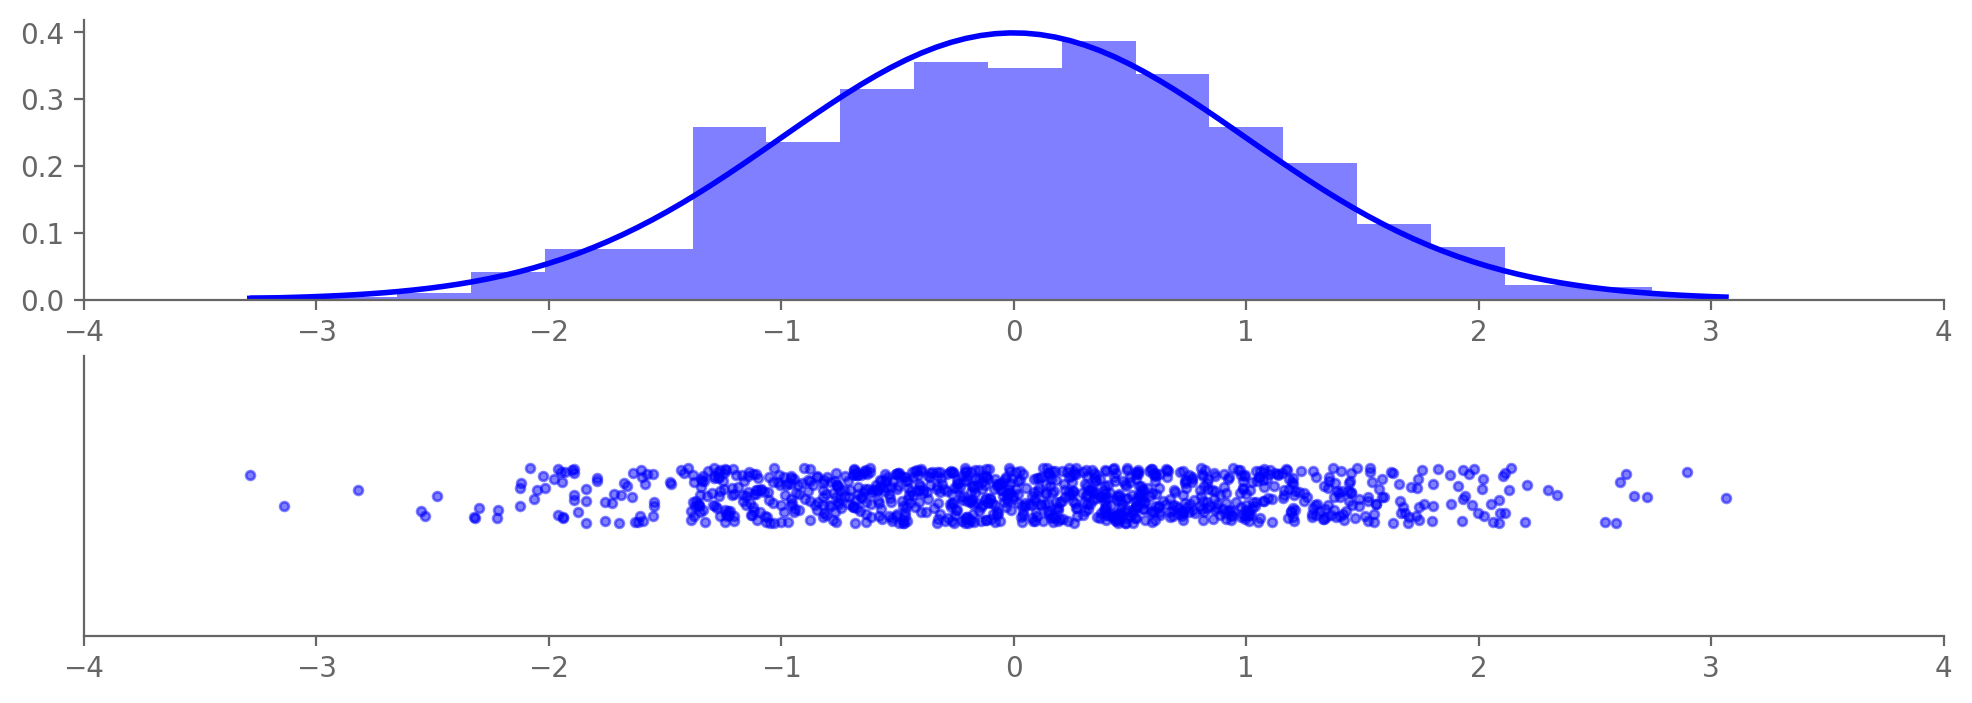

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from a standard normal distribution
samples = np.random.normal(0, 1, N)

# Apply jitter in the y-direction
jitter = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))#, gridspec_kw={'height_ratios': [1, 4]})

# Histogram and PDF
count, bins, _ = ax1.hist(samples, bins=20, density=True, alpha=0.5, color='b')
xmin, xmax = min(samples), max(samples)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
ax1.plot(x, p, 'b', linewidth=2)

# Scatter plot
ax2.scatter(samples, jitter, color='b', alpha=0.5, s=10)

# Set axis limits and hide y-axis
ax1.set_xlim(-4, 4)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis
ax2.set_yticks([])

plt.show()

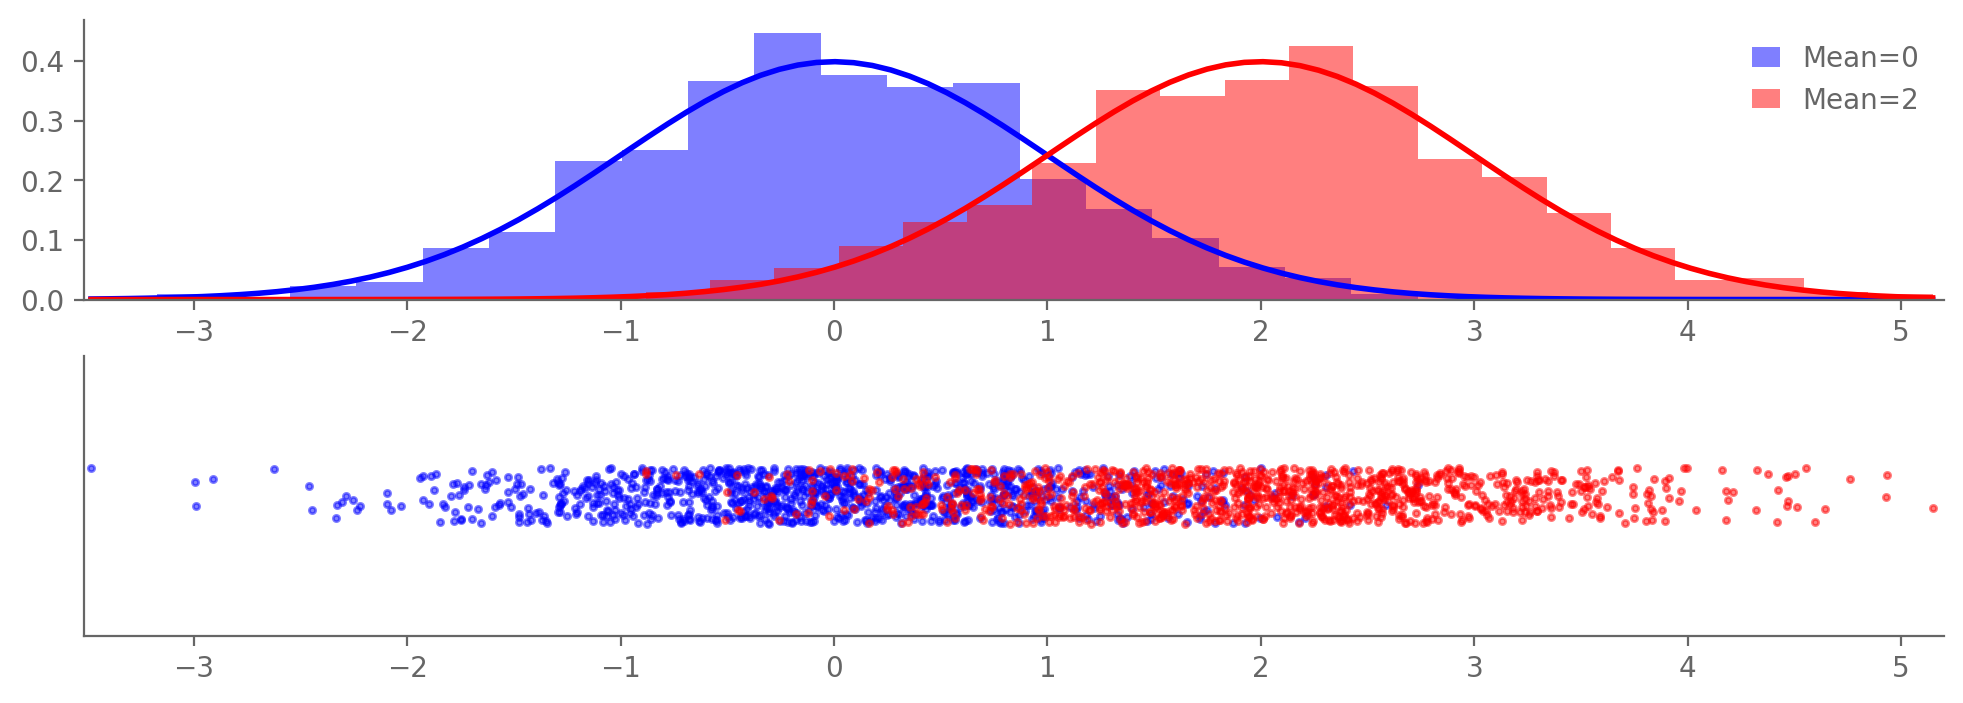

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from two different normal distributions
samples1 = np.random.normal(0, 1, N)
samples2 = np.random.normal(2, 1, N)

# Apply jitter in the y-direction
jitter1 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter2 = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

# Histogram and PDF for the first normal distribution
count1, bins1, _ = ax1.hist(samples1, bins=20, density=True, alpha=0.5, color='b', label='Mean=0')
xmin, xmax = np.min([samples1, samples2]), np.max([samples1, samples2])
x1 = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x1, 0, 1)
ax1.plot(x1, p1, 'b', linewidth=2)

# Histogram and PDF for the second normal distribution
count2, bins2, _ = ax1.hist(samples2, bins=20, density=True, alpha=0.5, color='r', label='Mean=2')
x2 = np.linspace(xmin, xmax, 100)
p2 = norm.pdf(x2, 2, 1)
ax1.plot(x2, p2, 'r', linewidth=2)

# Scatter plot for both distributions
ax2.scatter(samples1, jitter1, alpha=0.5, s=5, color='b')
ax2.scatter(samples2, jitter2, alpha=0.5, s=5, color='r')

# Legend and axis settings
ax1.legend()
ax1.set_xlim(1.01*xmin, 1.01*xmax)
ax2.set_xlim(1.01*xmin, 1.01*xmax)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis for the scatter plot
ax2.set_yticks([])

plt.show()

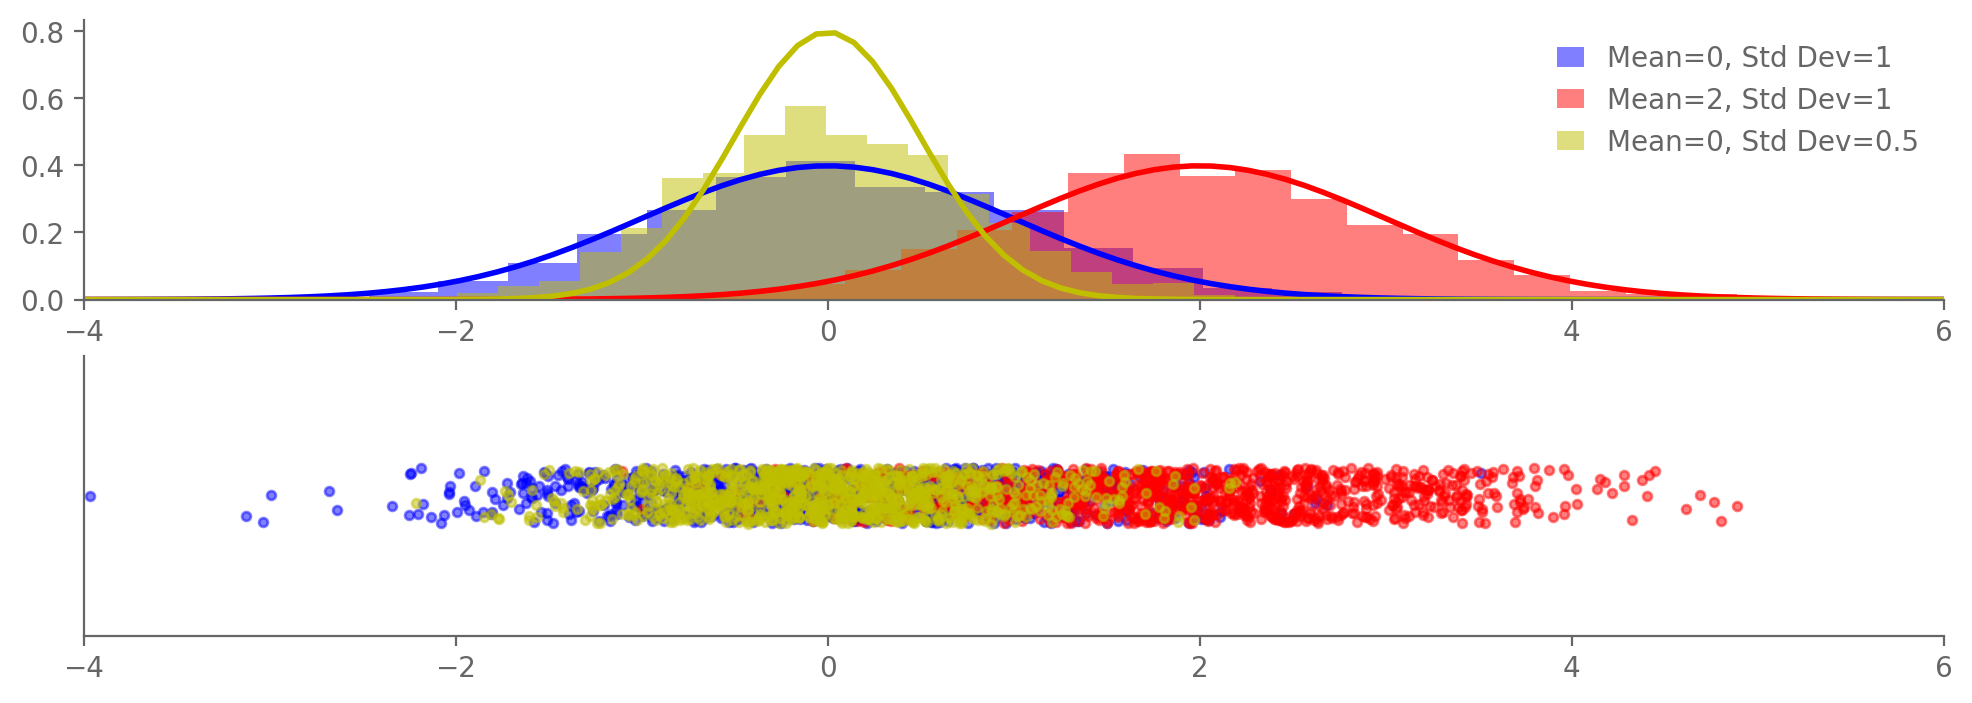

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from three different normal distributions
samples1 = np.random.normal(0, 1, N)  # Mean 0, std dev 1
samples2 = np.random.normal(2, 1, N)  # Mean 2, std dev 1
samples3 = np.random.normal(0, np.sqrt(0.5), N)  # Mean 0, std dev sqrt(0.5)

# Apply jitter in the y-direction
jitter1 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter2 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter3 = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

# Histogram and PDF for each normal distribution
colors = ['b', 'r', 'y']
means = [0, 2, 0]
std_devs = [1, 1, 0.5]

for i, (color, mean, std_dev, samples) in enumerate(zip(colors, means, std_devs, [samples1, samples2, samples3])):
    ax1.hist(samples, bins=20, density=True, alpha=0.5, color=color, label=f'Mean={mean}, Std Dev={std_dev}')
    x = np.linspace(-4, 6, 100)
    p = norm.pdf(x, mean, std_dev)
    ax1.plot(x, p, color, linewidth=2)

# Scatter plot for all distributions
ax2.scatter(samples1, jitter1, alpha=0.5, s=10, color='b')
ax2.scatter(samples2, jitter2, alpha=0.5, s=10, color='r')
ax2.scatter(samples3, jitter3, alpha=0.5, s=10, color='y')

# Legend and axis settings
ax1.legend()
ax1.set_xlim(-4, 6)
ax2.set_xlim(-4, 6)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis for the scatter plot
ax2.set_yticks([])

plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
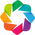

/Users/sah2249/miniconda3/envs/stat-methods-course/lib/python3.11/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/Users/sah2249/miniconda3/envs/stat-methods-course/lib/python3.11/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


Column
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] IntSlider(end=5000, name='N (Number of Points)', start=100, step=100, value=1000)
            [1] Checkbox(name='Enable Jitter')
        [1] Row
            [0] HoloViews(Layout, name='interactive00961')

In [8]:
import holoviews as hv
import panel as pn
from scipy.stats import norm
import numpy as np

hv.extension('bokeh')

def plot_samples(N=1000, jitter=False):
    # Generate N samples from standard normal
    samples = np.random.normal(0, 1, N)
    
    # Add jitter if checkbox is selected
    if jitter:
        jitter_amount = 0.01
        jitter_values = np.random.uniform(-jitter_amount, jitter_amount, N)
    else:
        jitter_values = np.zeros(N)
        
    # Create scatter plot
    scatter = hv.Scatter((samples, jitter_values)).opts(
        width=900,
        height=200,
        size=5,
        alpha=0.5,
        xlim=(-4, 4),
        ylim=(-0.05, 0.05),
        yaxis=None
    )
    
    # Create histogram and fit normal distribution
    hist = np.histogram(samples, bins=20, density=True)
    x = np.linspace(-4, 4, 100)
    fitted_params = norm.fit(samples)
    pdf_fitted = norm.pdf(x, *fitted_params)
    
    histogram = hv.Histogram(hist, kdims=['Value']).opts(
        width=900,
        height=200,
        alpha=0.5,
        xlim=(-4, 4)
    )
    
    fitted_curve = hv.Curve((x, pdf_fitted), kdims=['Value'], vdims=['Density']).opts(
        line_width=2,
        color='red'
    )
    
    return (histogram * fitted_curve + scatter).cols(1)

# Create widgets
N_slider = pn.widgets.IntSlider(name='N (Number of Points)', start=100, end=5000, step=100, value=1000)
jitter_checkbox = pn.widgets.Checkbox(name='Enable Jitter', value=False)

# Create interactive plot
interactive_plot = pn.interact(plot_samples, N=N_slider, jitter=jitter_checkbox)

# Display the interactive plot
pn.Column("# Interactive Standard Normal Sample Plot", interactive_plot).servable()

### Other probability distributions

In class, we covered the [uniform](https://en.wikipedia.org/wiki/Discrete_uniform_distribution), [binomial](https://en.wikipedia.org/wiki/Binomial_distribution), and [normal](https://en.wikipedia.org/wiki/Normal_distribution) distributions.  There are many other distributions that come up regularly in Earth and Atmospheric Sciences and statistics more generally.  These include:

- [Student's $t$](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (in tests of differences in means)
- [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution)
- [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) (for precipitation)
- [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) ($\chi^2$; in tests of differences in variance)
- [Generalized Extreme Value](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution) (in block minima and maxima)

## Central Limit Theorem

### Conceptually

Conceptually / in essence: the sum of random variables tends to be Gaussian, whether or not the variable themselves are Gaussian.

### Formally

Formally:

Let $X_1$, ..., $X_N$ be independent and identically distributed ("IID") random variables, all with identical mean $\mu_X$ and identical (finite) variance $\sigma_X$.  *Note that, while they must be IID, their distribution does **not** have to be the Gaussian.*  Then the random variable
$$Z=\frac{\hat\mu_X-\mu_X}{\sigma_X/\sqrt{N}}$$
converges to the standard normal distribution as $N\rightarrow\infty$.

### Examples

#### Average of one or more dice rolls

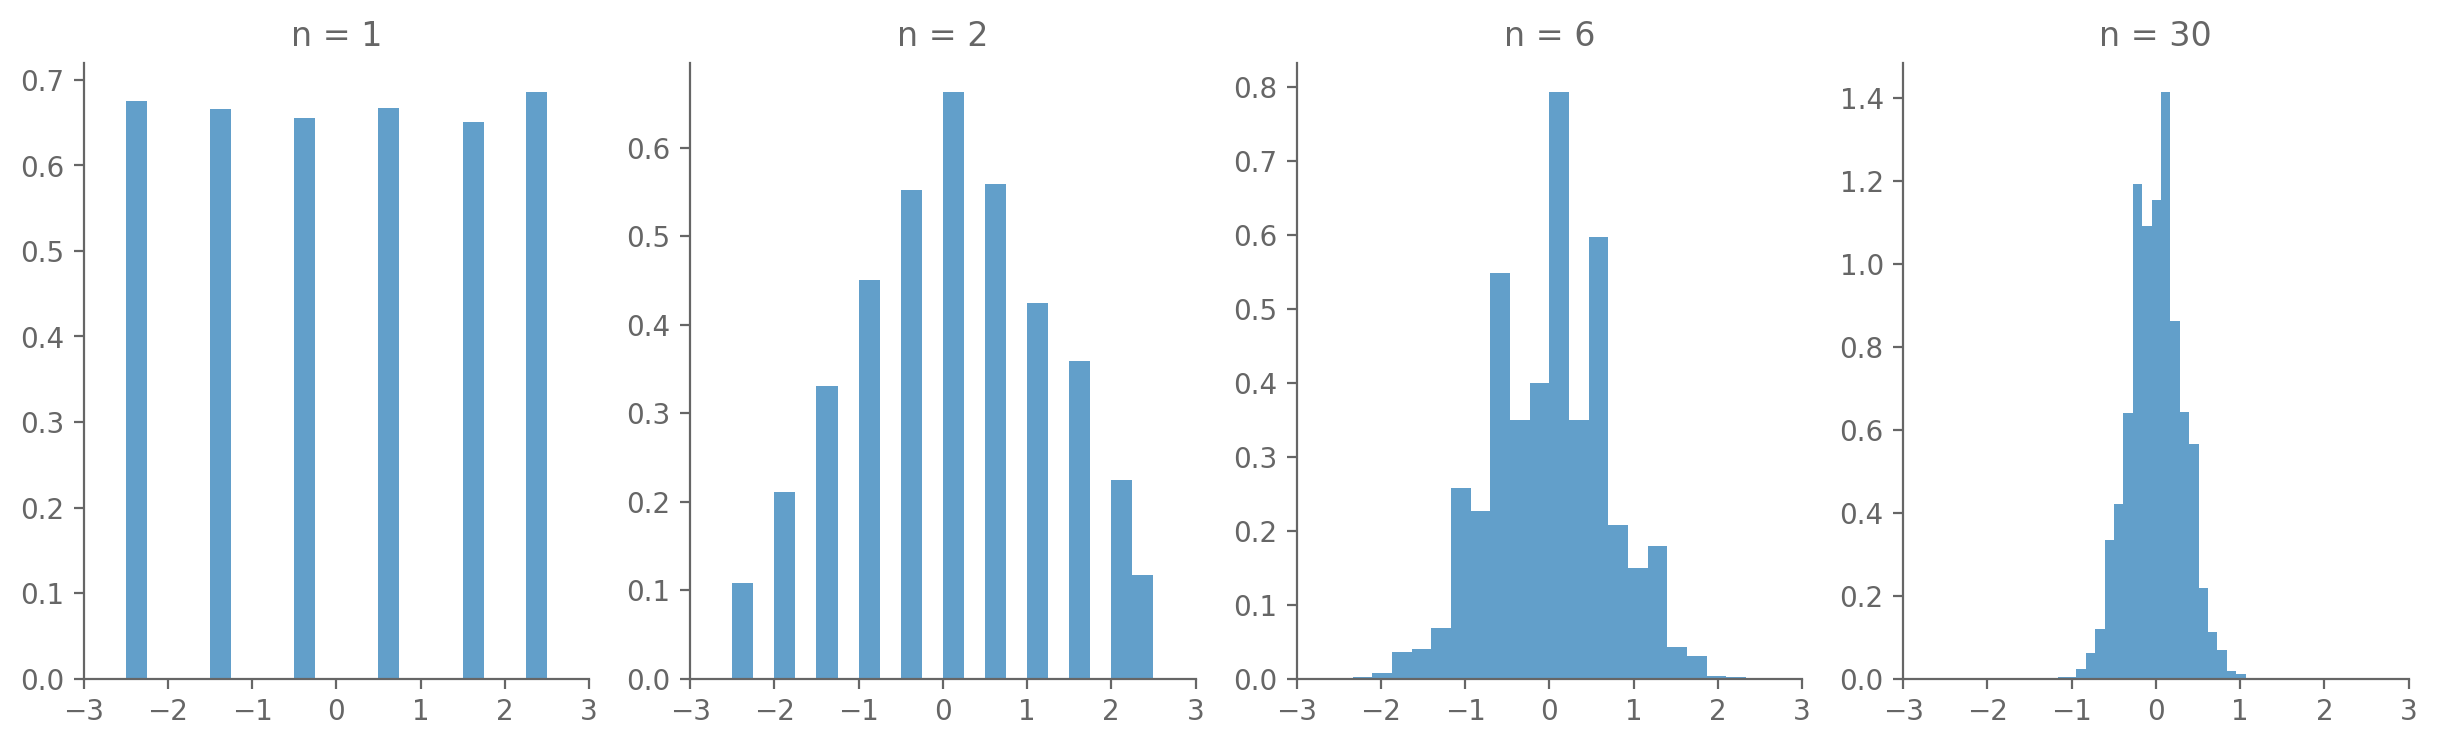

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate rolling a die
def roll_die(n):
    return np.random.randint(1, 7, n)

# Number of simulations
num_simulations = 10000

# Different numbers of dice to roll
num_dice = [1, 2, 6, 30]

# Initialize the plot
fig, axs = plt.subplots(1, len(num_dice), figsize=(15, 4))

# Loop through each subplot and perform the simulation
for i, n in enumerate(num_dice):
    averages = []
    for _ in range(num_simulations):
        rolls = roll_die(n)
        average = np.mean(rolls)
        averages.append(average)
    
    # Plotting the histogram
    axs[i].hist(np.array(averages)-3.5, bins=20, density=True, alpha=0.7, label="Sample Average")
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlim([-3, 3])

# Show plot
plt.show()

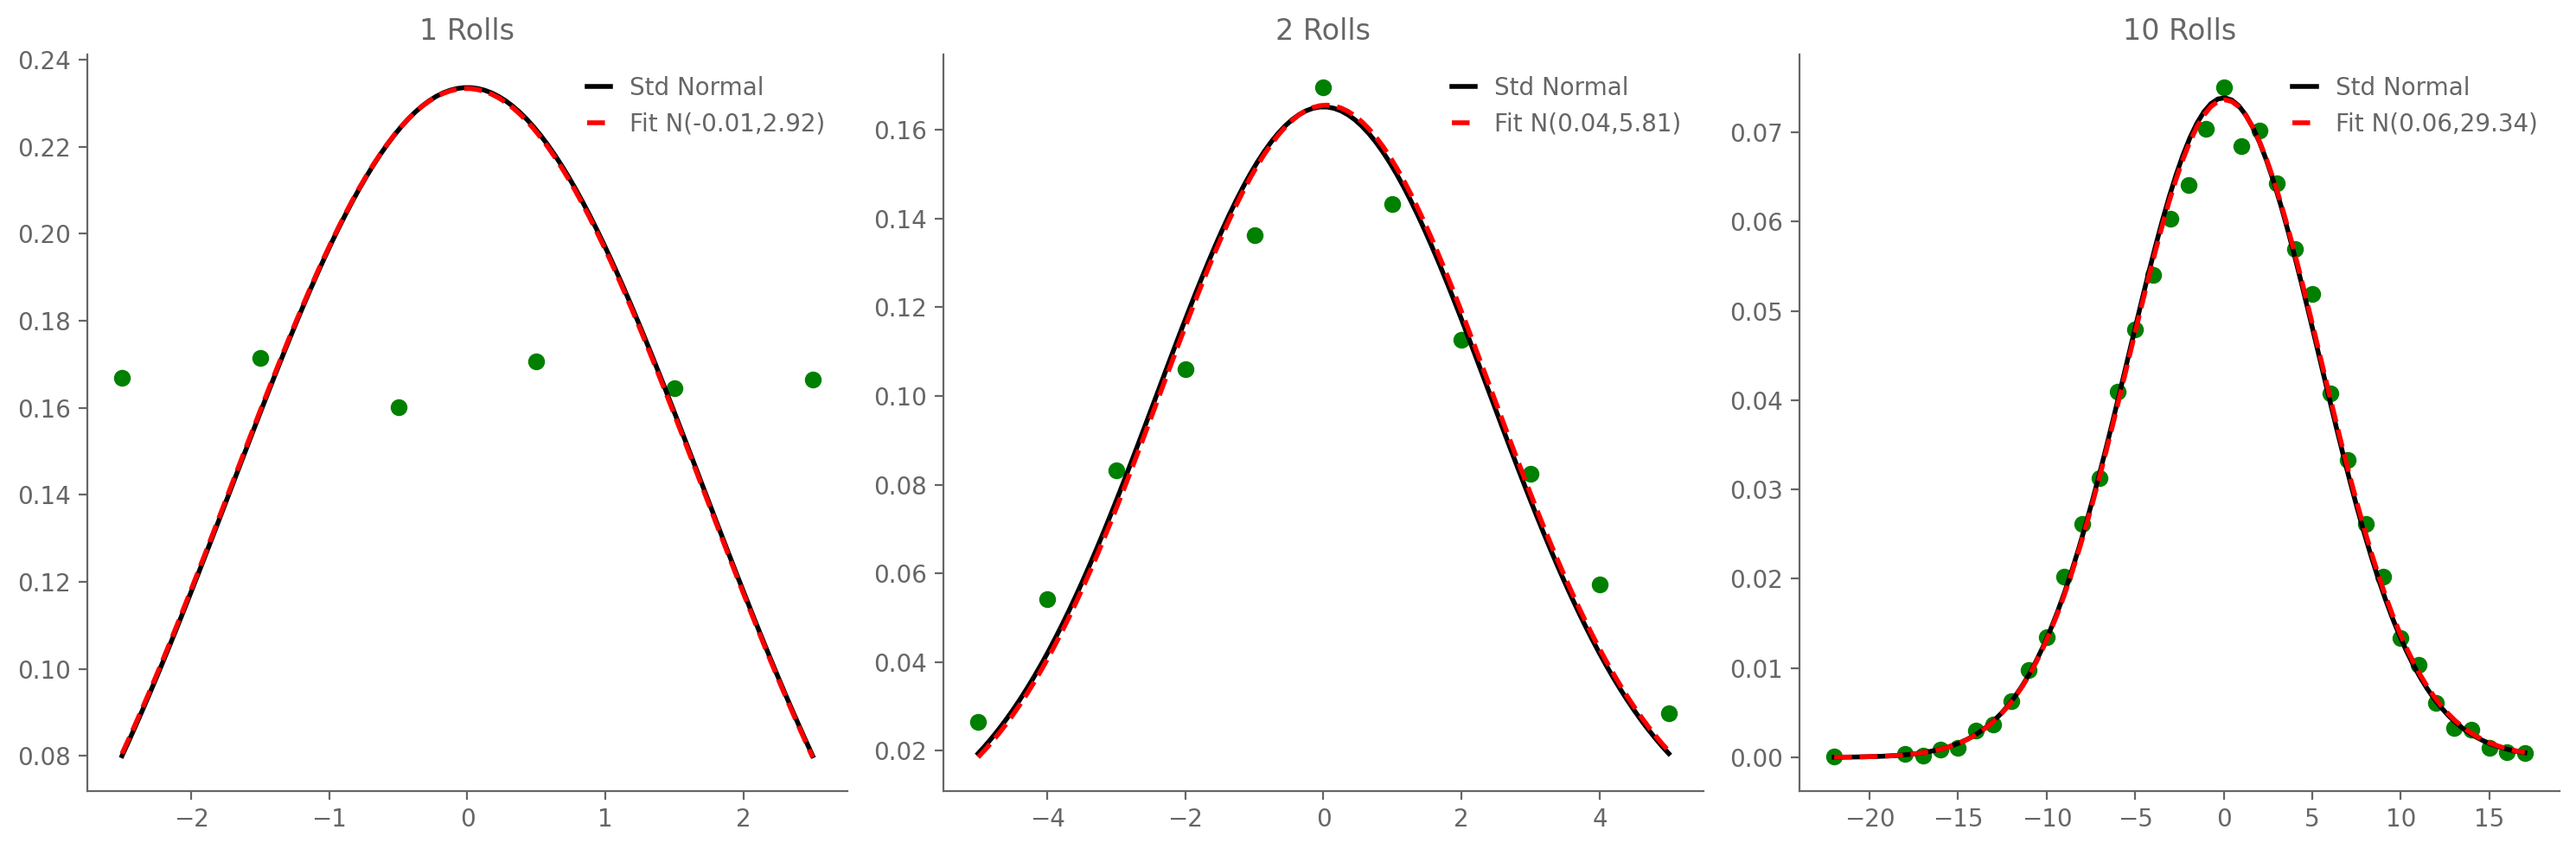

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Number of dice rolls and number of experiments
n_rolls = [1, 2, 10]
n_experiments = 10000

# Create a subplot of 1 row and len(n_rolls) columns
fig, axes = plt.subplots(1, len(n_rolls), figsize=(15, 5))

# Loop over the different number of rolls
for i, rolls in enumerate(n_rolls):
    ax = axes[i]

    # Simulate the sum of `rolls` dice rolls, `n_experiments` times
    total = np.sum(np.random.randint(1, 7, (n_experiments, rolls)), axis=1)

    # Center the data by subtracting 3.5 * rolls (the expectation)
    total_centered = total - 3.5 * rolls

    # Get unique values and their counts
    unique_vals, counts = np.unique(total_centered, return_counts=True)

    # Normalize the counts to get frequencies
    frequencies = counts / np.sum(counts)

    # Scatter plot
    ax.scatter(unique_vals, frequencies, color='g')

    # Overlay a standard normal distribution
    x = np.linspace(min(total_centered), max(total_centered), 100)
    p = norm.pdf(x, 0, np.sqrt(rolls * 35 / 12))
    ax.plot(x, p, 'k', linewidth=2, label='Std Normal')

    # Fit a normal distribution to the data
    mu, std = norm.fit(total_centered)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=2, label=f'Fit N({mu:.2f},{std ** 2:.2f})')

    ax.set_title(f'{rolls} Rolls')
    ax.legend()

plt.tight_layout()
plt.show()


#### Galton Boards

## Conclusions

## Supplementary Materials